# Trabalho de Sobredispersão em Modelos de Contagem
1. Análise exploratória dos dados
2. Ajuste do modelo de Poisson
3. Teste de sobredispersão
4. Ajuste do modelo binomial negativo
5. Análise de excesso de zeros e comparação de modelos

# RecreationDemand

## Descrição Geral

O conjunto de dados `RecreationDemand` contém informações coletadas em 1980 por meio de uma pesquisa com 2.000 proprietários de barcos de lazer registrados em 23 condados do leste do Texas, EUA. A pesquisa visava entender a demanda por viagens recreativas de barco ao Lago Somerville, além de coletar dados sobre características dos entrevistados e custos associados a visitas a outros lagos da região.

O conjunto é frequentemente utilizado em análises econométricas de dados de contagem, como modelos de Poisson, binomial negativa, modelos zero-inflados e modelos hurdle.

## Estrutura dos Dados

* **Observações**: 659
* **Variáveis**: 8

## Descrição das Variáveis

- **trips**: Número de viagens recreativas de barco realizadas ao Lago Somerville.
- **quality**: Avaliação subjetiva da qualidade das instalações do lago, em uma escala de 1 a 5. Para indivíduos que não visitaram o lago, o valor é 0.
- **ski**: Indica se o indivíduo praticou esqui aquático no lago (`sim` ou `não`).
- **income**: Renda anual da família do entrevistado, em milhares de dólares americanos (USD).
- **userfee**: Indica se o indivíduo pagou uma taxa anual de uso no Lago Somerville (`sim` ou `não`).
- **costC**: Despesa estimada ao visitar o Lago Conroe, em dólares americanos (USD).
- **costS**: Despesa estimada ao visitar o Lago Somerville, em dólares americanos (USD).
- **costH**: Despesa estimada ao visitar o Lago Houston, em dólares americanos (USD).

### Observações

- A variável "quality" inclui o valor 0 para não visitantes, o que pode reduzir sua média, conforme explicado em Seller et al. (1985).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pprint import pprint

In [2]:
recreation_demand = sm.datasets.get_rdataset("RecreationDemand", "AER", cache=True)

## 1. Análise Exploratória dos Dados

In [3]:
data = recreation_demand.data
# data.to_csv("./data/RecreationDemand.csv", index=False)
data.head()

,trips,quality,ski,income,userfee,costC,costS,costH
0,0,0,yes,4,no,67.59,68.620,76.800
1,0,0,no,9,no,68.86,70.936,84.780
2,0,0,yes,5,no,58.12,59.465,72.110
3,0,0,no,2,no,15.79,13.750,23.680
4,0,0,yes,3,no,24.02,34.033,34.547


Começaremos a análise identificando os tipos de variáveis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   trips    659 non-null    int64  
 1   quality  659 non-null    int64  
 2   ski      659 non-null    object 
 3   income   659 non-null    int64  
 4   userfee  659 non-null    object 
 5   costC    659 non-null    float64
 6   costS    659 non-null    float64
 7   costH    659 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 41.3+ KB


In [5]:
data.describe()

,trips,quality,income,costC,costS,costH
count,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000
mean,2.244310,1.418816,3.852807,55.423704,59.928053,55.990303
std,6.292475,1.811986,1.851937,46.682648,46.376676,46.133211
min,0.000000,0.000000,1.000000,4.340000,4.767000,5.700000
25%,0.000000,0.000000,3.000000,28.240000,33.312000,28.963500
50%,0.000000,0.000000,3.000000,41.190000,47.000000,42.380000
75%,2.000000,3.000000,5.000000,69.675000,72.573500,68.560000
max,88.000000,5.000000,9.000000,493.770000,491.547000,491.049000


In [6]:
data["quality"].value_counts().sort_index()

quality
0    374
1     32
2     31
3    101
4     67
5     54
Name: count, dtype: int64

In [7]:
data["income"].value_counts().sort_index()

income
1     42
2     87
3    206
4    144
5     83
6     38
7     17
8     11
9     31
Name: count, dtype: int64

In [8]:
data["ski"].value_counts().sort_index()

ski
no     417
yes    242
Name: count, dtype: int64

In [9]:
data["userfee"].value_counts().sort_index()

userfee
no     646
yes     13
Name: count, dtype: int64

Agora visualizaremos a distribuição de cada uma delas

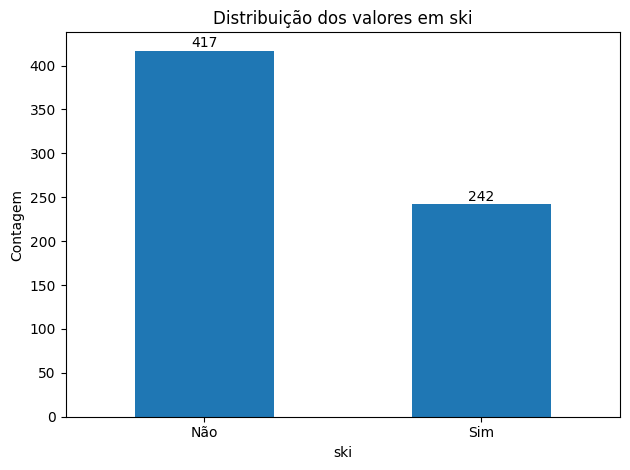

In [10]:
ax = data["ski"].value_counts().plot(kind="bar")

for i, v in enumerate(data["ski"].value_counts()):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom")

plt.ylabel("Contagem")
plt.title("Distribuição dos valores em ski")
plt.xticks([0, 1], ["Não", "Sim"], rotation=0)
plt.tight_layout()
plt.show()

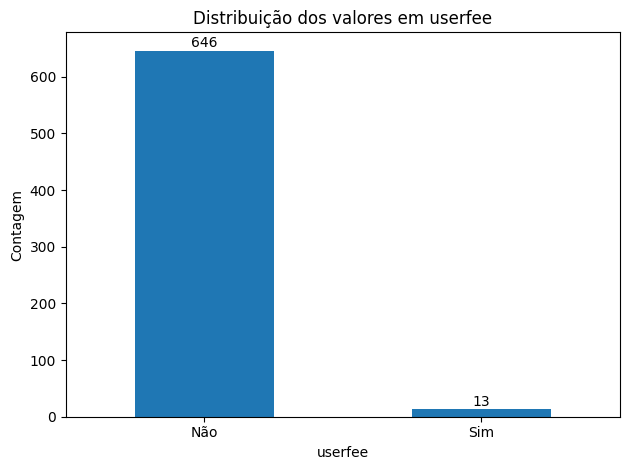

In [11]:
ax = data["userfee"].value_counts().plot(kind="bar")

for i, v in enumerate(data["userfee"].value_counts()):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom")

plt.ylabel("Contagem")

plt.title("Distribuição dos valores em userfee")
plt.xticks([0, 1], ["Não", "Sim"], rotation=0)
plt.tight_layout()
plt.show()

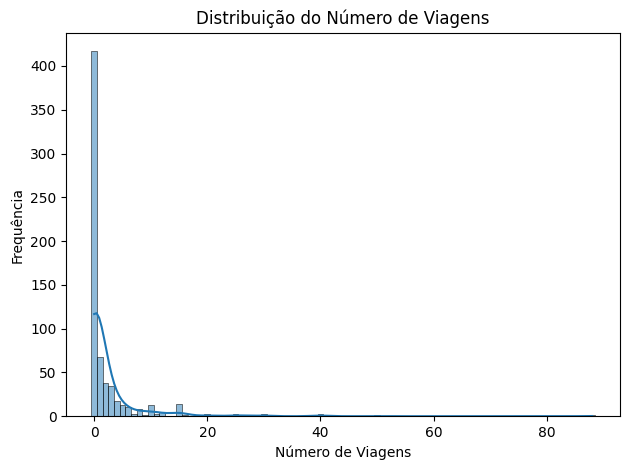

In [12]:
sns.histplot(
    data["trips"],
    kde=True,
    discrete=True,
)
plt.title("Distribuição do Número de Viagens")
plt.xlabel("Número de Viagens")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

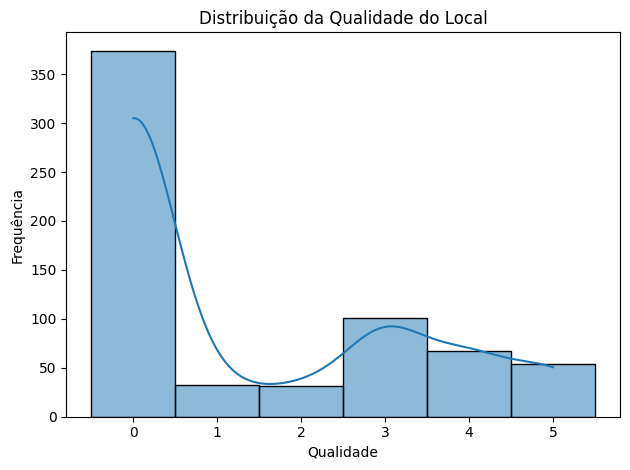

In [13]:
sns.histplot(data["quality"], discrete=True, kde=True)
plt.title("Distribuição da Qualidade do Local")
plt.xlabel("Qualidade")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

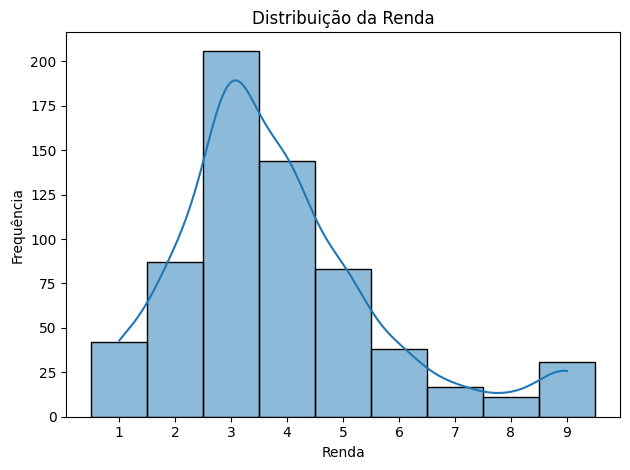

In [14]:
sns.histplot(
    data["income"],
    kde=True,
    discrete=True,
)
plt.title("Distribuição da Renda")
plt.xlabel("Renda")
plt.xticks(range(1, 10))
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

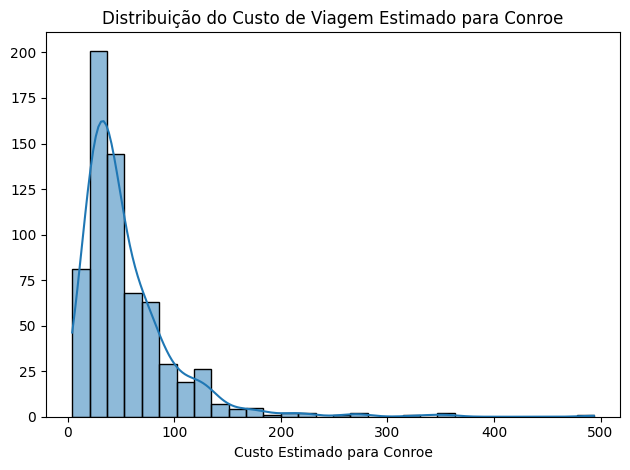

In [15]:
sns.histplot(data["costC"], kde=True, bins=30)
plt.title("Distribuição do Custo de Viagem Estimado para Conroe")
plt.xlabel("Custo Estimado para Conroe")
plt.ylabel(None)
plt.tight_layout()
plt.show()

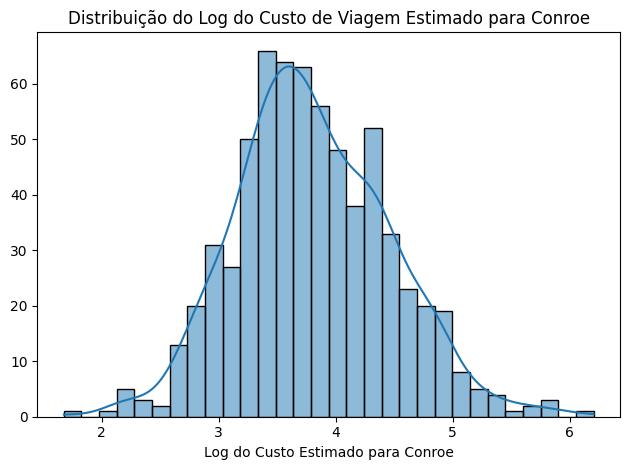

In [16]:
sns.histplot(np.log(data["costC"] + 1), kde=True, bins=30)
plt.title("Distribuição do Log do Custo de Viagem Estimado para Conroe")
plt.xlabel("Log do Custo Estimado para Conroe")
plt.ylabel(None)
plt.tight_layout()
plt.show()

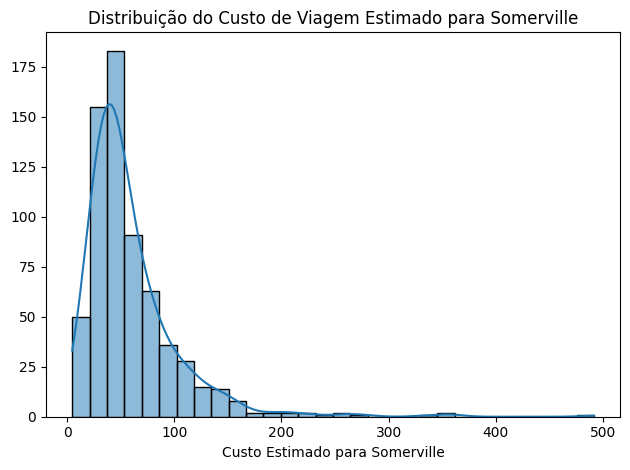

In [17]:
sns.histplot(data["costS"], kde=True, bins=30)
plt.title("Distribuição do Custo de Viagem Estimado para Somerville")
plt.xlabel("Custo Estimado para Somerville")
plt.ylabel(None)
plt.tight_layout()
plt.show()

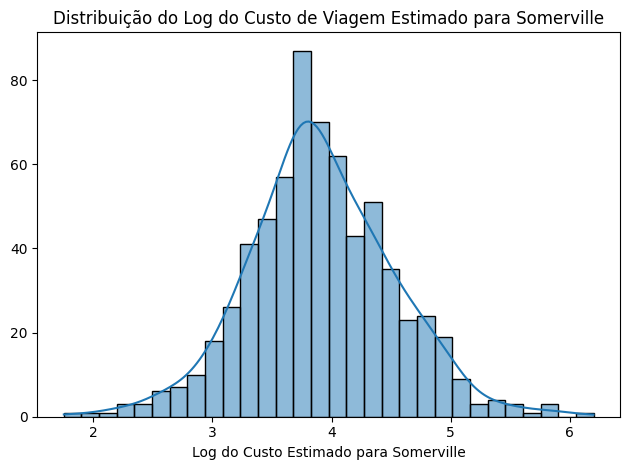

In [18]:
sns.histplot(np.log(data["costS"] + 1), kde=True, bins=30)
plt.title("Distribuição do Log do Custo de Viagem Estimado para Somerville")
plt.xlabel("Log do Custo Estimado para Somerville")
plt.ylabel(None)
plt.tight_layout()
plt.show()

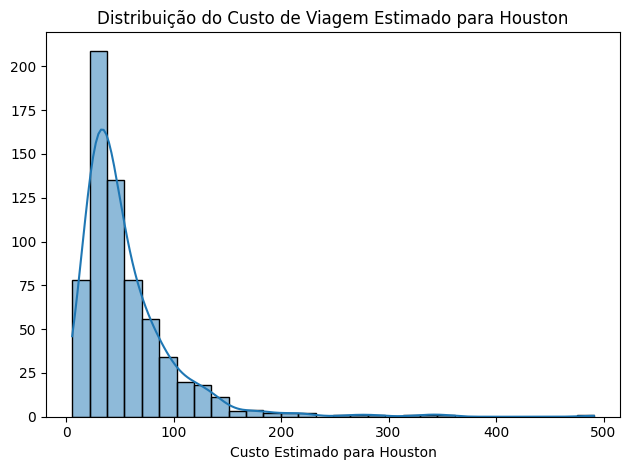

In [19]:
sns.histplot(data["costH"], kde=True, bins=30)
plt.title("Distribuição do Custo de Viagem Estimado para Houston")
plt.xlabel("Custo Estimado para Houston")
plt.ylabel(None)
plt.tight_layout()
plt.show()

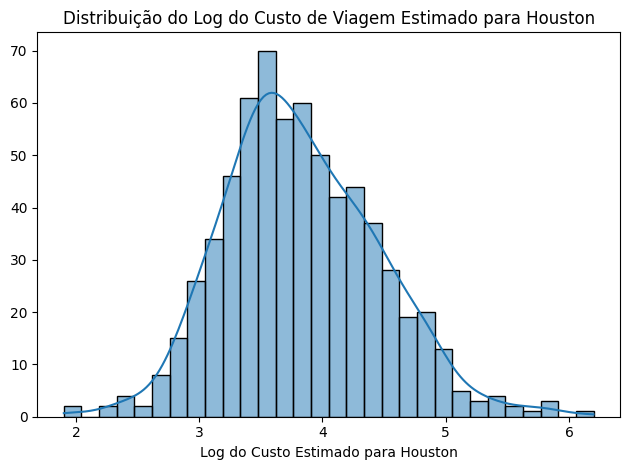

In [20]:
sns.histplot(np.log(data["costH"] + 1), kde=True, bins=30)
plt.title("Distribuição do Log do Custo de Viagem Estimado para Houston")
plt.xlabel("Log do Custo Estimado para Houston")
plt.ylabel(None)
plt.tight_layout()
plt.show()

In [21]:
# used_cols = [col for col in data.columns if col not in ["ski", "userfee"]]

data_correlation = data.copy()

data_correlation["ski"] = data_correlation["ski"].apply(lambda x: int(x == "yes"))
data_correlation["userfee"] = data_correlation["userfee"].apply(lambda x: int(x == "yes"))

correlation_matrix = data_correlation.corr()

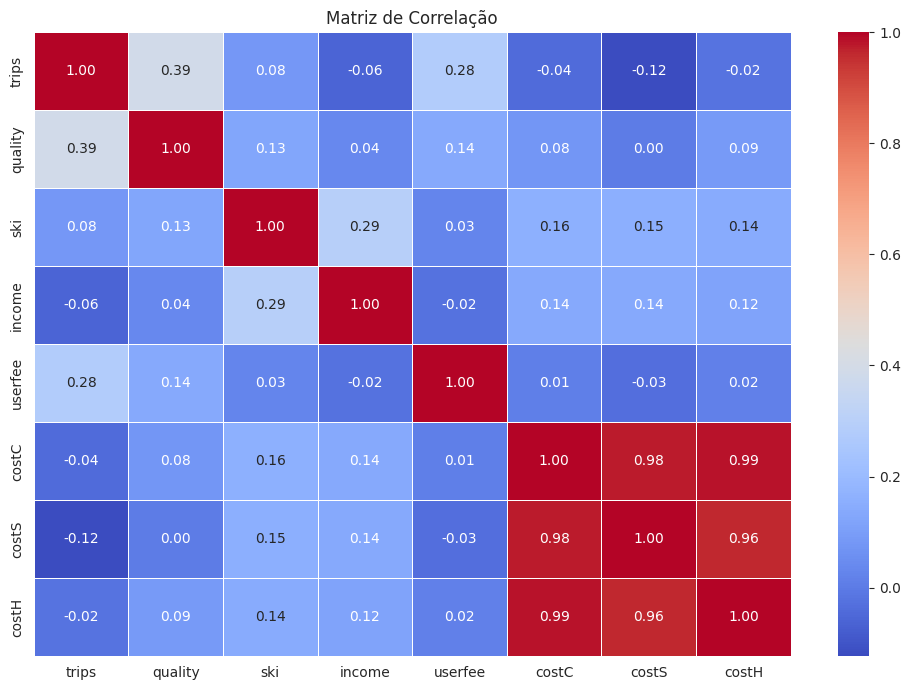

In [22]:
plt.figure(figsize=(10, 7))
sns.set_style(style="white")
heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
)
plt.title("Matriz de Correlação")

plt.tight_layout()

plt.show()

In [23]:
data_correlation["costC_log"] = np.log(data_correlation["costC"] + 1)
data_correlation["costS_log"] = np.log(data_correlation["costS"] + 1)
data_correlation["costH_log"] = np.log(data_correlation["costH"] + 1)

In [24]:
correlation_matrix_logs = data_correlation.drop(columns=["costC", "costS", "costH"]).corr()

In [25]:
correlation_matrix_logs

,trips,quality,ski,income,userfee,costC_log,costS_log,costH_log
trips,1.000000,0.386351,0.079041,-0.060030,0.279107,-0.017639,-0.222033,0.019436
quality,0.386351,1.000000,0.126303,0.037420,0.135937,0.144081,-0.013543,0.152246
ski,0.079041,0.126303,1.000000,0.293644,0.027755,0.227361,0.214553,0.199851
income,-0.060030,0.037420,0.293644,1.000000,-0.024097,0.161564,0.162876,0.121740
userfee,0.279107,0.135937,0.027755,-0.024097,1.000000,0.030414,-0.070961,0.039692
costC_log,-0.017639,0.144081,0.227361,0.161564,0.030414,1.000000,0.912380,0.963778
costS_log,-0.222033,-0.013543,0.214553,0.162876,-0.070961,0.912380,1.000000,0.875249
costH_log,0.019436,0.152246,0.199851,0.121740,0.039692,0.963778,0.875249,1.000000


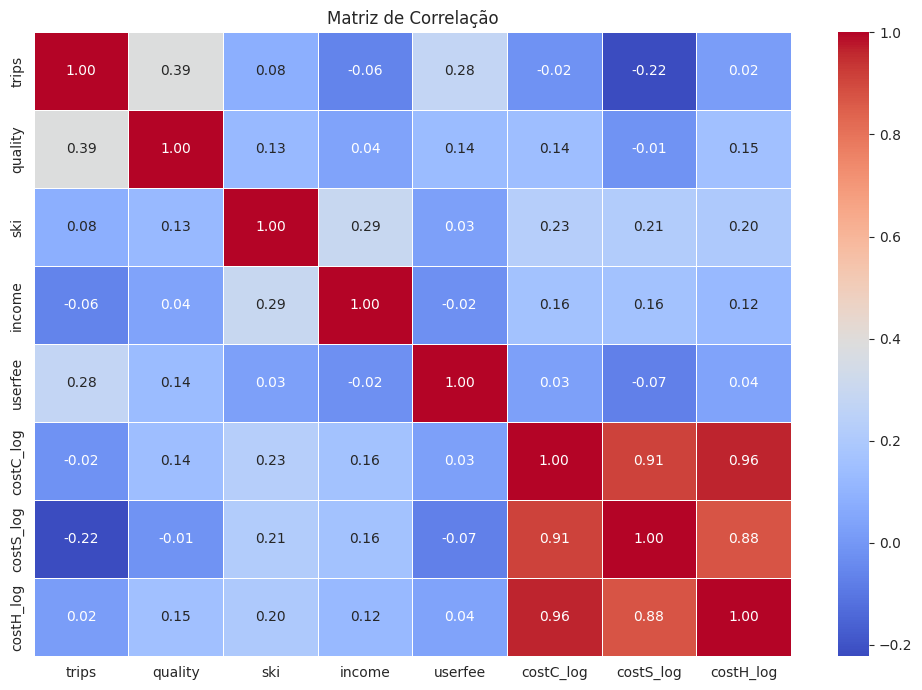

In [26]:
plt.figure(figsize=(10, 7))
sns.set_style(style="white")
heatmap = sns.heatmap(
    correlation_matrix_logs,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
)
plt.title("Matriz de Correlação")

plt.tight_layout()

plt.show()

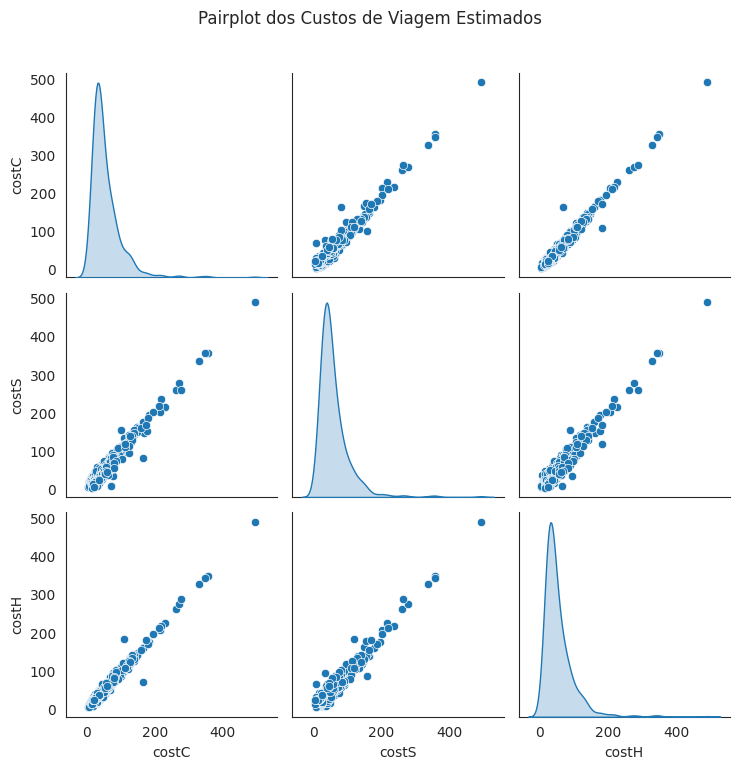

In [27]:
sns.pairplot(
    data,
    diag_kind="kde",
    x_vars=["costC", "costS", "costH"],
    y_vars=["costC", "costS", "costH"],
)

plt.suptitle("Pairplot dos Custos de Viagem Estimados", y=1.02)
plt.tight_layout()

plt.show()

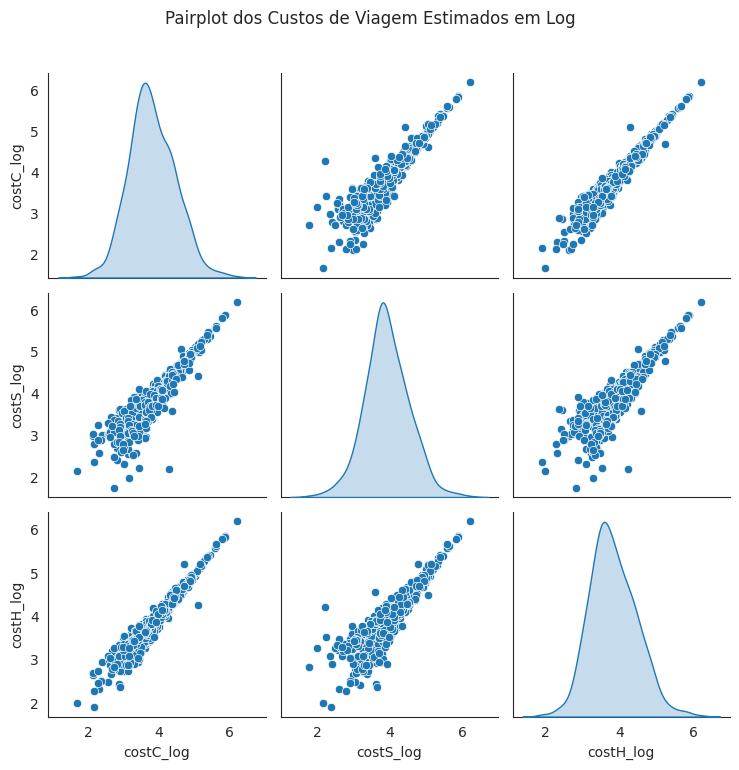

In [28]:
sns.pairplot(
    data_correlation,
    diag_kind="kde",
    x_vars=["costC_log", "costS_log", "costH_log"],
    y_vars=["costC_log", "costS_log", "costH_log"],
)

plt.suptitle("Pairplot dos Custos de Viagem Estimados em Log", y=1.02)
plt.tight_layout()

plt.show()

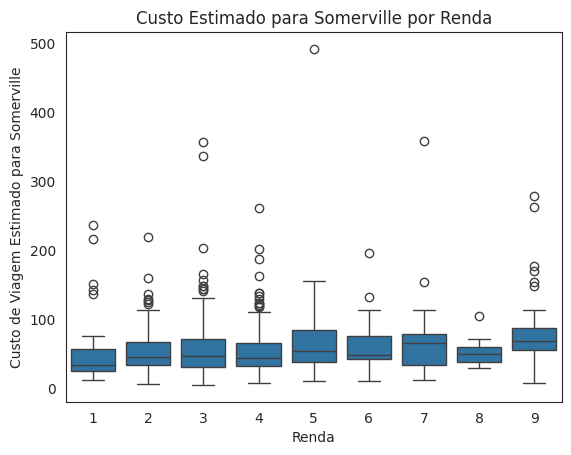

In [29]:
sns.boxplot(
    x="income",
    y="costS",
    data=data,
)
plt.title("Custo Estimado para Somerville por Renda")
plt.xlabel("Renda")
plt.ylabel("Custo de Viagem Estimado para Somerville")

plt.show()

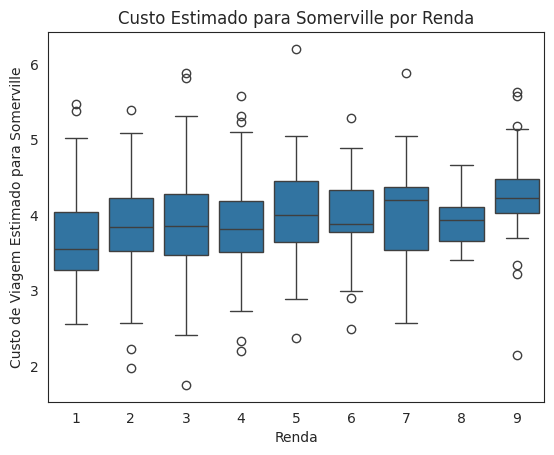

In [30]:
sns.boxplot(
    x="income",
    y="costS_log",
    data=data_correlation,
)
plt.title("Custo Estimado para Somerville por Renda")
plt.xlabel("Renda")
plt.ylabel("Custo de Viagem Estimado para Somerville")

plt.show()

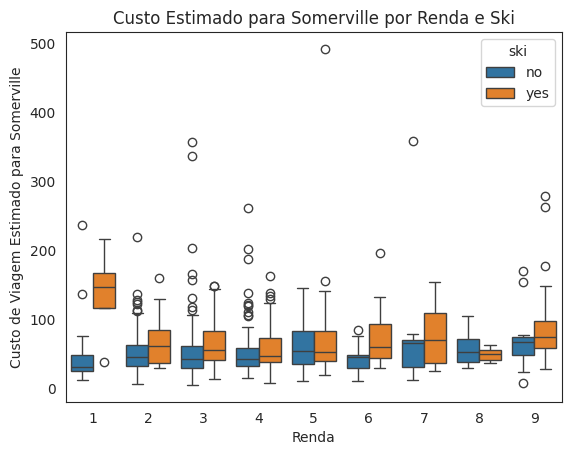

In [31]:
sns.boxplot(
    x="income",
    y="costS",
    data=data,
    hue="ski",
)
plt.title("Custo Estimado para Somerville por Renda e Ski")
plt.xlabel("Renda")
plt.ylabel("Custo de Viagem Estimado para Somerville")

plt.show()

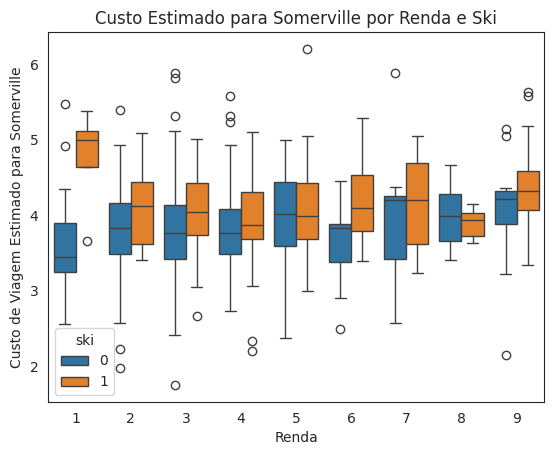

In [32]:
sns.boxplot(
    x="income",
    y="costS_log",
    data=data_correlation,
    hue="ski",
)
plt.title("Custo Estimado para Somerville por Renda e Ski")
plt.xlabel("Renda")
plt.ylabel("Custo de Viagem Estimado para Somerville")

plt.show()

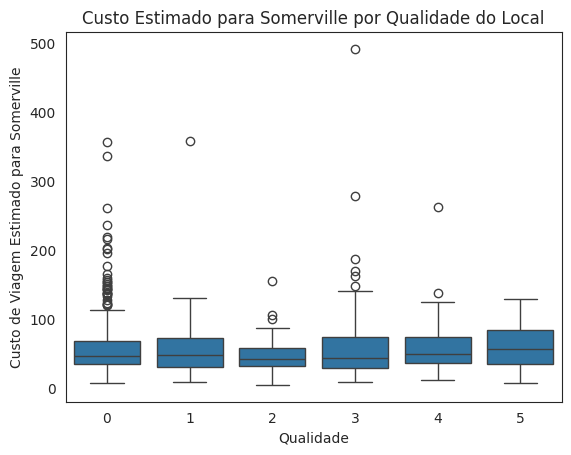

In [33]:
sns.boxplot(
    x="quality",
    y="costS",
    data=data,
)
plt.title("Custo Estimado para Somerville por Qualidade do Local")
plt.xlabel("Qualidade")
plt.ylabel("Custo de Viagem Estimado para Somerville")
plt.show()

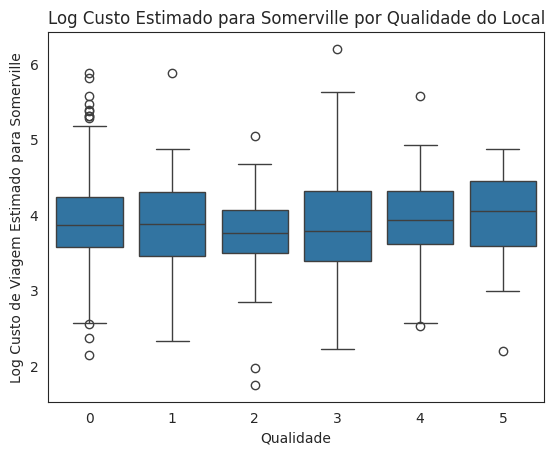

In [34]:
sns.boxplot(
    x="quality",
    y="costS_log",
    data=data_correlation,
)
plt.title("Log Custo Estimado para Somerville por Qualidade do Local")
plt.xlabel("Qualidade")
plt.ylabel("Log Custo de Viagem Estimado para Somerville")
plt.show()

In [35]:
trips_mean = data[trips := "trips"].mean()
trips_var = data[trips].var()
print(f"Média de trips: {trips_mean:.2f}")
print(f"Variância de trips: {trips_var:.2f}")

Média de trips: 2.24
Variância de trips: 39.60


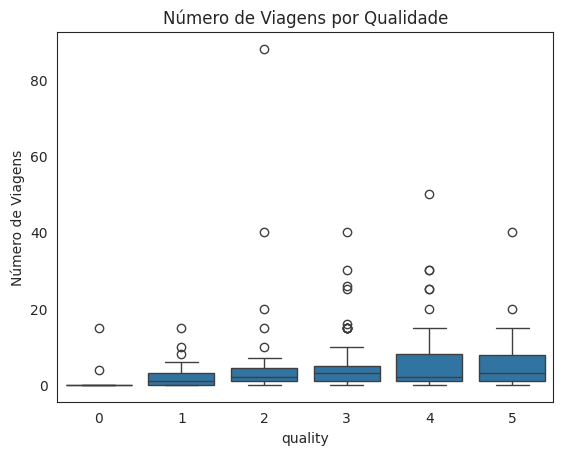

In [36]:
sns.boxplot(
    x="quality",
    y="trips",
    data=data,
)
plt.title("Número de Viagens por Qualidade")
plt.ylabel("Número de Viagens")
plt.show()

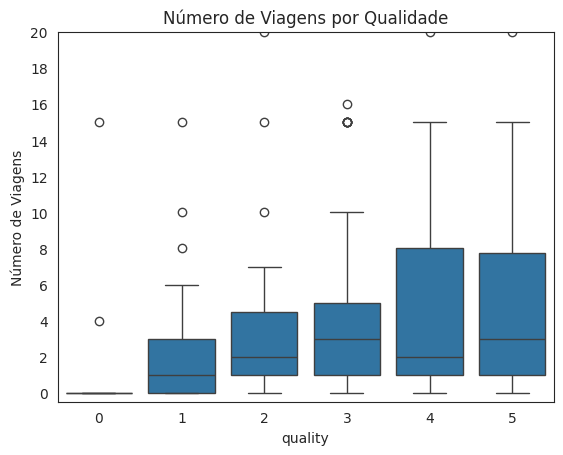

In [37]:
sns.boxplot(
    x="quality",
    y="trips",
    data=data,
)
plt.title("Número de Viagens por Qualidade")
plt.ylabel("Número de Viagens")
plt.ylim(-0.5, 20)
plt.yticks(range(0, 21, 2))
plt.show()

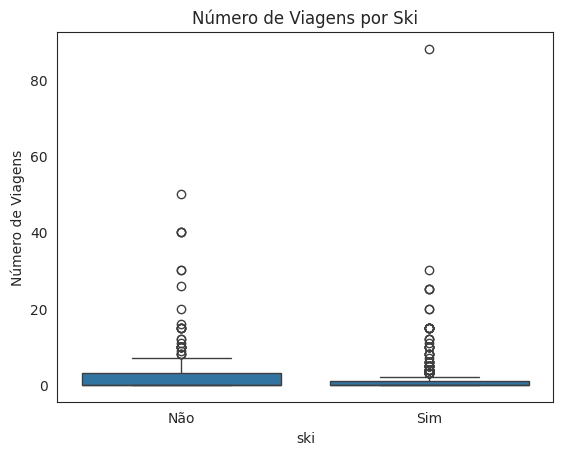

In [38]:
sns.boxplot(
    x="ski",
    y="trips",
    data=data
)
plt.xticks([0, 1], ["Não", "Sim"])
plt.title("Número de Viagens por Ski")
plt.ylabel("Número de Viagens")
plt.show()

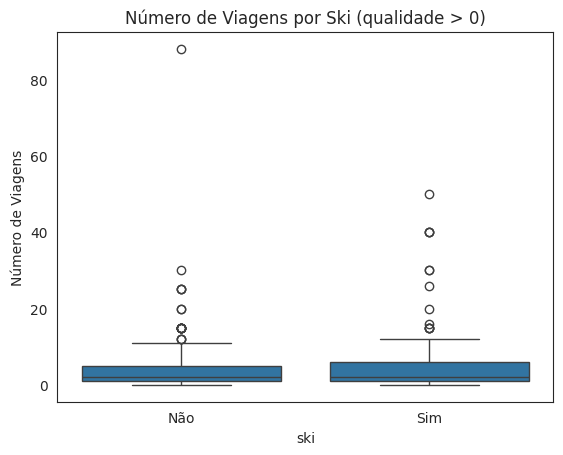

In [39]:
sns.boxplot(x="ski", y="trips", data=data[data["quality"] > 0])
plt.xticks([0, 1], ["Não", "Sim"])
plt.title("Número de Viagens por Ski (qualidade > 0)")
plt.ylabel("Número de Viagens")
plt.show()

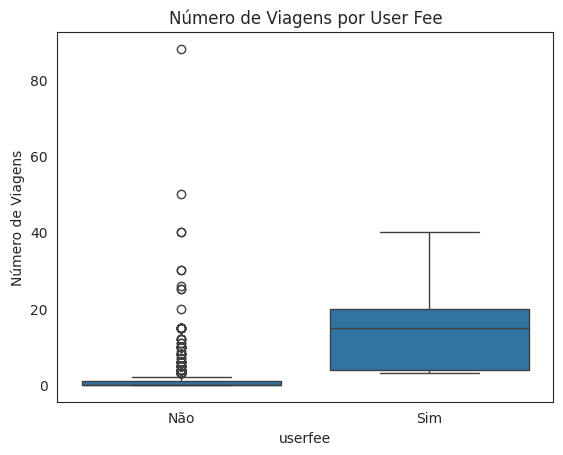

In [40]:
sns.boxplot(
    x="userfee",
    y="trips",
    data=data,
)
plt.xticks([0, 1], ["Não", "Sim"])
plt.title("Número de Viagens por User Fee")
plt.ylabel("Número de Viagens")
plt.show()

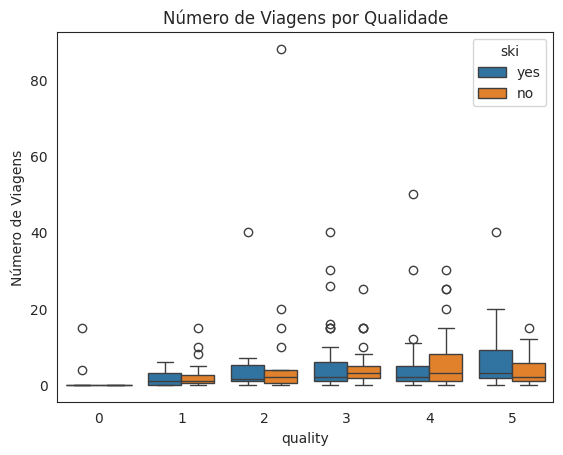

In [41]:
sns.boxplot(
    x="quality",
    y="trips",
    data=data,
    hue="ski",
)
plt.title("Número de Viagens por Qualidade")
plt.ylabel("Número de Viagens")
plt.show()

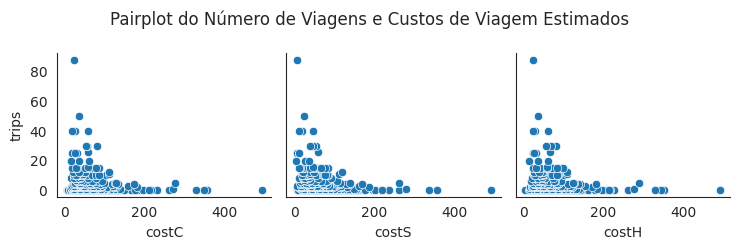

In [42]:
sns.pairplot(y_vars=["trips"], x_vars=["costC", "costS", "costH"], data=data)

plt.suptitle("Pairplot do Número de Viagens e Custos de Viagem Estimados")
plt.tight_layout()
plt.show()

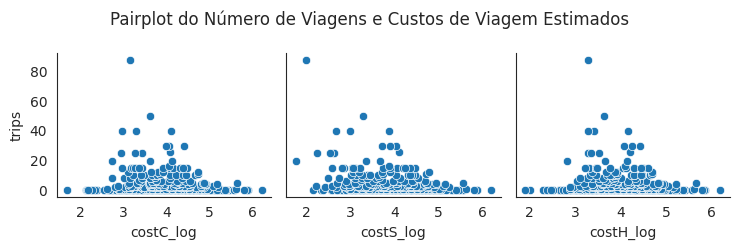

In [43]:
sns.pairplot(
    y_vars=["trips"], x_vars=["costC_log", "costS_log", "costH_log"], data=data_correlation
)

plt.suptitle("Pairplot do Número de Viagens e Custos de Viagem Estimados")
plt.tight_layout()
plt.show()

In [44]:
data_correlation.drop(columns=["costC", "costH", "costC_log", "costH_log"], inplace=True)

In [45]:
data_correlation.drop(columns=["costS"], inplace=True)

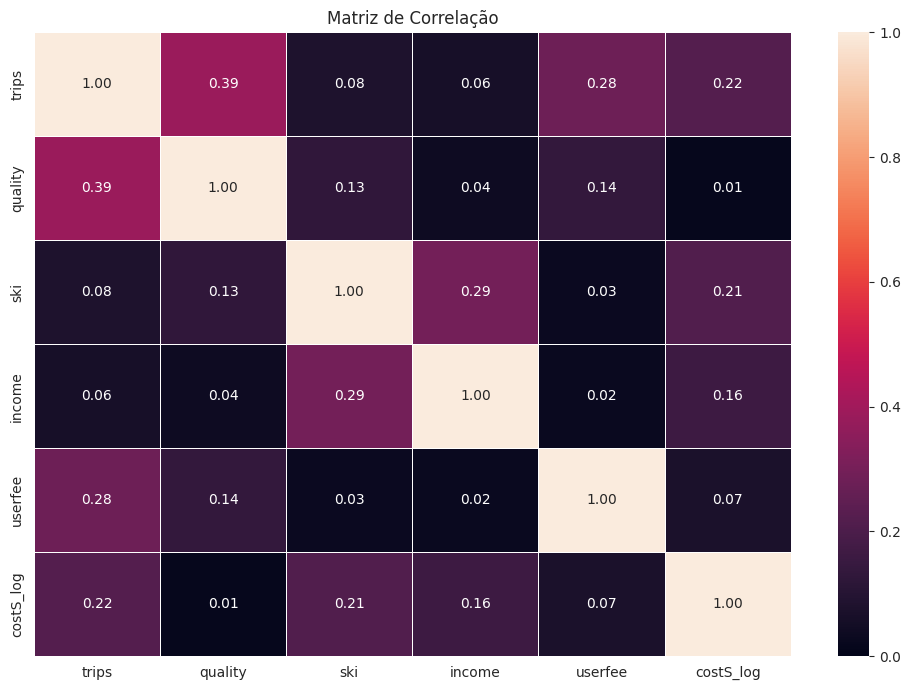

In [46]:
plt.figure(figsize=(10, 7))
sns.set_style(style="white")
heatmap = sns.heatmap(
    np.abs(data_correlation.corr()),
    # cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    vmin=0,
    vmax=1,
)
plt.title("Matriz de Correlação")

plt.tight_layout()

plt.show()

Garantiremos o uso das variáveis quality, userfee e costS_log pela alta correlação com a variável trips

In [47]:
np.abs(data_correlation.corr()["trips"]).sort_values(ascending=False)

trips        1.000000
quality      0.386351
userfee      0.279107
costS_log    0.222033
ski          0.079041
income       0.060030
Name: trips, dtype: float64

In [48]:
data_correlation.drop(columns=["income", "ski"], inplace=True)

data_correlation["visited"] = (data_correlation["quality"] > 0).astype(int)

data_correlation["quality_cost_log"] = (
    data_correlation["quality"] * data_correlation["costS_log"]
)

data_correlation["cost_visit_log"] = (
    data_correlation["costS_log"] * data_correlation["visited"]
)
data_correlation["cost_userfee_log"] = (
    data_correlation["costS_log"] * data_correlation["userfee"]
)

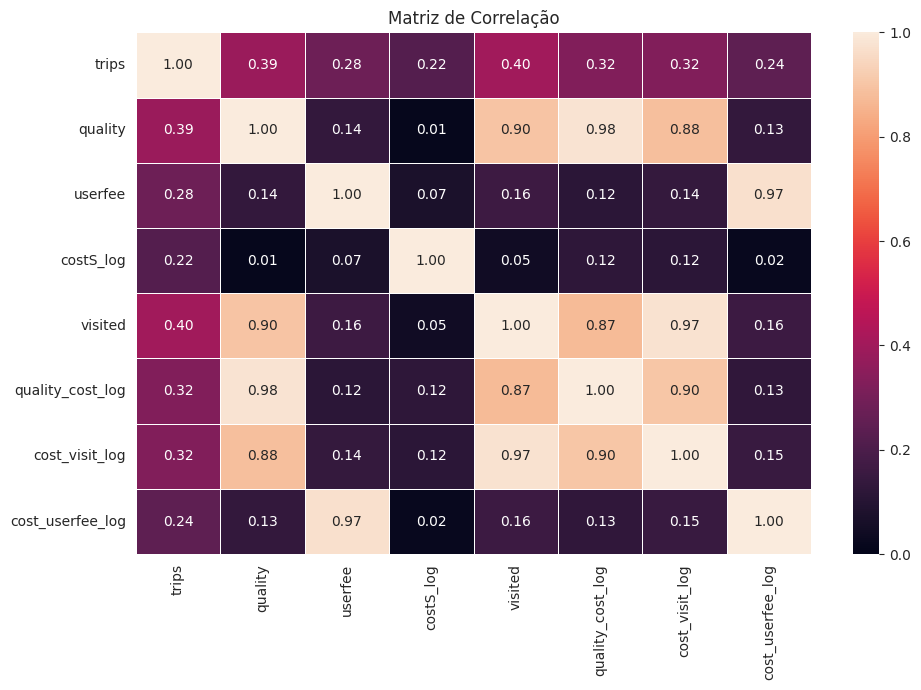

In [49]:
plt.figure(figsize=(10, 7))
sns.set_style(style="white")
heatmap = sns.heatmap(
    np.abs(data_correlation.corr()),
    # cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    vmin=0,
    vmax=1,
)
plt.title("Matriz de Correlação")

plt.tight_layout()

plt.show()

In [50]:
correls = np.abs(data_correlation.corr()["trips"]).sort_values(ascending=False)
correls

trips               1.000000
visited             0.399632
quality             0.386351
cost_visit_log      0.324887
quality_cost_log    0.324681
userfee             0.279107
cost_userfee_log    0.243169
costS_log           0.222033
Name: trips, dtype: float64

## 2. Análise do modelo de Poisson

In [51]:
poisson_model = smf.glm(
    formula="trips ~ 1",
    data=data_correlation,
    family=sm.families.Poisson(),
).fit()

print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  trips   No. Observations:                  659
Model:                            GLM   Df Residuals:                      658
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2801.4
Date:                Thu, 29 May 2025   Deviance:                       4849.7
Time:                        12:06:08   Pearson chi2:                 1.16e+04
No. Iterations:                     6   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8084      0.026     31.089      0.0

In [52]:
preds = poisson_model.fittedvalues
np.mean((preds - data_correlation["trips"]) ** 2)

np.float64(39.535153506600565)

In [53]:
poisson_model = smf.glm(
    formula="trips ~ quality",
    data=data_correlation,
    family=sm.families.Poisson(),
).fit()

print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  trips   No. Observations:                  659
Model:                            GLM   Df Residuals:                      657
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2023.7
Date:                Thu, 29 May 2025   Deviance:                       3294.4
Time:                        12:06:08   Pearson chi2:                 9.20e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9056
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5138      0.058     -8.933      0.0

In [54]:
preds = poisson_model.fittedvalues
np.mean((preds - data_correlation["trips"]) ** 2)

np.float64(35.77235389123517)

In [55]:
poisson_model = smf.glm(
    formula="trips ~ visited",
    data=data_correlation,
    family=sm.families.Poisson(),
).fit()

print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  trips   No. Observations:                  659
Model:                            GLM   Df Residuals:                      657
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1668.4
Date:                Thu, 29 May 2025   Deviance:                       2583.7
Time:                        12:06:08   Pearson chi2:                 8.95e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.9679
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9798      0.229    -12.989      0.0

In [56]:
preds = poisson_model.fittedvalues
np.mean((preds - data_correlation["trips"]) ** 2)

np.float64(33.22114797229781)

In [57]:
poisson_model = smf.glm(
    formula="trips ~ quality + userfee + visited",
    data=data_correlation,
    family=sm.families.Poisson(),
).fit()

print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  trips   No. Observations:                  659
Model:                            GLM   Df Residuals:                      655
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1575.3
Date:                Thu, 29 May 2025   Deviance:                       2397.4
Time:                        12:06:08   Pearson chi2:                 9.05e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.9758
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9798      0.229    -12.989      0.0

In [58]:
preds = poisson_model.fittedvalues
np.mean((preds - data_correlation["trips"]) ** 2)

np.float64(31.113131403877066)

In [59]:
poisson_model = smf.glm(
    formula="trips ~ quality + userfee + costS_log + visited",
    data=data_correlation,
    family=sm.families.Poisson(),
).fit()

print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  trips   No. Observations:                  659
Model:                            GLM   Df Residuals:                      654
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1396.4
Date:                Thu, 29 May 2025   Deviance:                       2039.8
Time:                        12:06:08   Pearson chi2:                 8.50e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.9859
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2469      0.269     -0.918      0.3

In [60]:
preds = poisson_model.fittedvalues
np.mean((preds - data_correlation["trips"]) ** 2)

np.float64(27.626261366744966)

In [61]:
selected_poisson_model = smf.glm(
    formula="trips ~ costS_log * (quality + visited + userfee)",
    data=data_correlation,
    family=sm.families.Poisson(),
).fit()

print(selected_poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  trips   No. Observations:                  659
Model:                            GLM   Df Residuals:                      651
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1358.0
Date:                Thu, 29 May 2025   Deviance:                       1962.9
Time:                        12:06:08   Pearson chi2:                 7.12e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.9875
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -6.0564      1.54

## 3. Teste de Sobredispersão

In [62]:
preds = selected_poisson_model.fittedvalues

In [63]:
diff = data_correlation["trips"] - preds

z_i = (np.power(diff, 2) - data_correlation["trips"]) / preds
# z_i = (diff ** 2 - data_correlation["trips"])

In [64]:
data_correlation["z_i"] = z_i
data_correlation["mu_hat"] = preds

In [65]:
data_test_ct = data_correlation[["z_i", "mu_hat"]].copy()

In [66]:
overdisp_test_model = smf.ols("z_i ~ mu_hat - 1", data=data_test_ct).fit()
print(overdisp_test_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    z_i   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.8033
Date:                Thu, 29 May 2025   Prob (F-statistic):                       0.370
Time:                        12:06:08   Log-Likelihood:                         -4286.9
No. Observations:                 659   AIC:                                      8576.
Df Residuals:                     658   BIC:                                      8580.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

P valor de 0.370 (Alto pra xuxu) indica que re